In [1]:
import pandas as pd
import numpy as np
import json
import math
import sys
import matplotlib.pyplot as plot

In [2]:
women= pd.read_csv('C:\\Users\\annam\\OneDrive\\Desktop\\corso Big Data Analytic\\project_work\\woman-shoes\\Datafiniti_Womens_Shoes.csv')
women_2019= pd.read_csv('C:\\Users\\annam\\OneDrive\\Desktop\\corso Big Data Analytic\\project_work\\woman-shoes\\Datafiniti_Womens_Shoes_Jun19.csv')

In [3]:
women. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  object 
 1   dateAdded            10000 non-null  object 
 2   dateUpdated          10000 non-null  object 
 3   asins                3 non-null      object 
 4   brand                10000 non-null  object 
 5   categories           10000 non-null  object 
 6   primaryCategories    10000 non-null  object 
 7   colors               2631 non-null   object 
 8   dimension            117 non-null    object 
 9   ean                  671 non-null    float64
 10  imageURLs            10000 non-null  object 
 11  keys                 10000 non-null  object 
 12  manufacturer         527 non-null    object 
 13  manufacturerNumber   2482 non-null   object 
 14  name                 10000 non-null  object 
 15  prices.amountMax     10000 non-null  

In [4]:
women=women[['brand', 'categories', 'prices.amountMax', 'prices.amountMin', 'prices.color']]
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             10000 non-null  object 
 1   categories        10000 non-null  object 
 2   prices.amountMax  10000 non-null  float64
 3   prices.amountMin  10000 non-null  float64
 4   prices.color      10000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


In [5]:
women_2019=women_2019[['brand', 'categories', 'prices.amountMax', 'prices.amountMin', 'prices.color']]
women_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             10000 non-null  object 
 1   categories        10000 non-null  object 
 2   prices.amountMax  10000 non-null  float64
 3   prices.amountMin  10000 non-null  float64
 4   prices.color      10000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


In [6]:
women_shoes=women_2019.append(women)

In [7]:
women_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             20000 non-null  object 
 1   categories        20000 non-null  object 
 2   prices.amountMax  20000 non-null  float64
 3   prices.amountMin  20000 non-null  float64
 4   prices.color      20000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 937.5+ KB


In [8]:
women_shoes['prices.medium']=(women_shoes['prices.amountMax']+women_shoes['prices.amountMin'])/2
women_shoes['prices.medium']

0        29.950
1        84.000
2        49.950
3       127.200
4        47.660
         ...   
9995    104.955
9996     98.960
9997     96.710
9998    104.955
9999     74.960
Name: prices.medium, Length: 20000, dtype: float64

In [9]:
rows = women_shoes["categories"].unique()
#print(rows)
s = set()
for row in rows:
    #print("-- " + row)
    categories = row.split(",")
    for category in categories:
        print("---- " + category)
        s.add(category)
print(len(s))

---- Clothing
---- Shoes
---- Womens Shoes
---- All Womens Shoes
---- Womens Shoes
---- Clothing
---- All Womens Shoes
---- Shoes
---- Clothing
---- Women's Shoes
---- Women's Slippers
---- Men's Shoes
---- Shoes
---- Boys Shoes
---- All Boys Shoes
---- All Men's Shoes
---- Women's Athletic Shoes
---- Womens Shoes
---- Women's Shoes
---- Clothing
---- Athletic
---- Running Shoes
---- All Womens Shoes
---- Shoes
---- Womens' Athletic Shoes
---- Women's Athletic Shoes
---- Womens Shoes
---- Clothing
---- Women's Shoes
---- All Womens Shoes
---- Shoes
---- All Women's Shoes
---- Womens Shoes
---- Clothing
---- Women's Shoes
---- All Womens Shoes
---- Shoes
---- All Women's Shoes
---- Womens Shoes
---- Clothing
---- Women's Shoes
---- Women's Dress Shoes
---- All Womens Shoes
---- Shoes
---- All Women's Shoes
---- Womens Shoes
---- Women's Shoes
---- Clothing
---- All Womens Shoes
---- Shoes
---- All Women's Shoes
---- Womens Shoes
---- Clothing
---- Women's Shoes
---- Women's Dress Shoes


In [10]:
def v(x):
    if "Sneakers" in x:
        return "Sneakers"
    elif "Casual" in x or 'Oxfords'in x or 'Loafers' in x or 'Oxford' in x or 'Slippers' in x or 'Slip-ons' in x:
        return "Casual"
    elif "Outdoor" in x or "Outdoors" in x or 'Running' in x:
        return "Outdoor"
    elif "Athletic" in x:
        return "Athletic"
    else:
        'None'
        
    
    
    
women_shoes['categories_casual_sport']=women_shoes['categories'].apply(v)

In [11]:
women_shoes['categories_casual_sport']. unique()

array([None, 'Casual', 'Outdoor', 'Athletic', 'Sneakers'], dtype=object)

cat_def={"Athletic", "Oxfords", "Walking Shoes", "Womens' Athletic Shoes", "Running", "Golf Equipment", "Women's Golf Shoes", "Nike", "Loafers", "Slip-ons", "Women's Athletic Shoes", "Women's Slippers", "Running Shoes", "Golf Shoes", "Gravity Defyer", "Team Sports", "Basketball", "Hiking Shoes", "Outdoor", "Women's Casual Shoes", "Racquet Sports", "Moccasin Slippers", "Loafers & Slip-Ons", 'Easy Street', 'Slippers', 'Loafers Slip-Ons', 'Propet', 'Womens Comfort', 'Premium Womens Comfort', 'Premium Womens Slippers', 'Moccasins', 'Girls Slippers', 'Sneakers', 'Athletic Shoes', 'Skechers', 'Womens Casual Shoes', 'Womens Oxford & Loafers', 'Womens Oxfords', "Women's Slippers", 'New Balance', 'FILA', 'Other Slip-Ons', 'Nike', 'ASICS', "Women's Running Shoes", "Women's Trail Running Shoes","Women's Road Running Shoes", "Women's New Balance Sho", "Women's Casual Shoes" }

def y(x):
    cat_def={"Athletic", "Oxfords", "Walking Shoes", "Womens' Athletic Shoes", "Running", "Golf Equipment", "Women's Golf Shoes", "Nike", "Loafers", "Slip-ons", "Women's Athletic Shoes", "Women's Slippers", "Running Shoes", "Golf Shoes", "Gravity Defyer", "Team Sports", "Basketball", "Hiking Shoes", "Outdoor", "Women's Casual Shoes", "Racquet Sports", "Moccasin Slippers", "Loafers & Slip-Ons", 'Easy Street', 'Slippers', 'Loafers Slip-Ons', 'Propet', 'Womens Comfort', 'Premium Womens Comfort', 'Premium Womens Slippers', 'Moccasins', 'Girls Slippers', 'Sneakers', 'Athletic Shoes', 'Skechers', 'Womens Casual Shoes', 'Womens Oxford & Loafers', 'Womens Oxfords', "Women's Slippers", 'New Balance', 'FILA', 'Other Slip-Ons', 'Nike', 'ASICS', "Women's Running Shoes", "Women's Trail Running Shoes","Women's Road Running Shoes", "Women's New Balance Sho", "Women's Casual Shoes" }
    p=''
    for i in cat_def:
        if i in x:
            p=p+i+', '
    return p[:-2]

def g(x):
    for i in x:
        return y(x)

women_shoes['Categorie_DEF']= women_shoes['categories'].apply(g)

women_shoes=women_shoes[women_shoes['Categorie_DEF']!='']

In [12]:
women_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    20000 non-null  object 
 1   categories               20000 non-null  object 
 2   prices.amountMax         20000 non-null  float64
 3   prices.amountMin         20000 non-null  float64
 4   prices.color             20000 non-null  object 
 5   prices.medium            20000 non-null  float64
 6   categories_casual_sport  2556 non-null   object 
dtypes: float64(3), object(4)
memory usage: 1.2+ MB


In [13]:
women=women_shoes[['brand', 'categories_casual_sport', 'prices.color', 'prices.medium']]
women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    20000 non-null  object 
 1   categories_casual_sport  2556 non-null   object 
 2   prices.color             20000 non-null  object 
 3   prices.medium            20000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 781.2+ KB


In [14]:
women.dropna(inplace=True)

C:\Users\annam\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
p=women.groupby('categories_casual_sport').count().sort_values(by=['brand'], ascending=False)
p

,brand,prices.color,prices.medium
categories_casual_sport,,,
Sneakers,1580,1580,1580
Casual,771,771,771
Outdoor,202,202,202
Athletic,3,3,3


In [16]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 8636 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    2556 non-null   object 
 1   categories_casual_sport  2556 non-null   object 
 2   prices.color             2556 non-null   object 
 3   prices.medium            2556 non-null   float64
dtypes: float64(1), object(3)
memory usage: 99.8+ KB


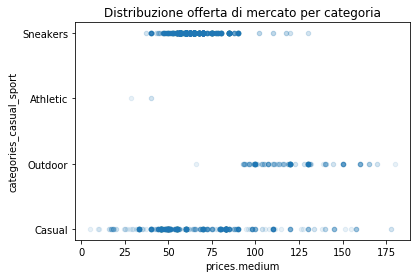

In [17]:
women.plot(x="prices.medium", y="categories_casual_sport", kind="scatter", alpha=0.1, s=20)
plot.title('Distribuzione offerta di mercato per categoria')
plot.show()

In [21]:
import matplotlib.pyplot as plot
distr_prezzi=women.groupby('categories_casual_sport').mean().sort_values(by=['prices.medium'], ascending=False)

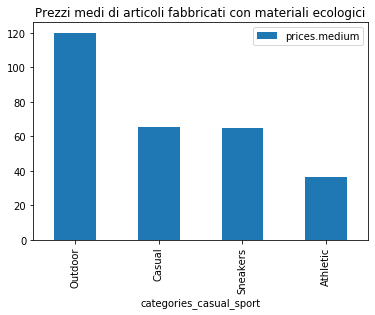

In [23]:
distr_prezzi.plot.bar(title="Prezzi medi di articoli fabbricati con materiali ecologici")

plot.show(block=True)